In [2]:
import sympy  as sp
from sympy import *
import numpy as np
#Para resolver sistemas de ecuaciones diferencials 
from sympy.solvers.ode.systems import dsolve_system
from IPython.display import display, Math

In [3]:
sp.interactive.printing.init_printing(use_latex=True)

In [4]:
#Declaración de las variables que vamos a usar
t, r, theta, phi = sp.symbols('t r theta phi')
c= sp.symbols('c')

#Vector con las variables que vamos a usar 
variables = [t, r, theta, phi]

In [7]:
#Expreso la métrica en forma matricial 
g = [[-c**2,0,0,0],
    [0,1,0,0],
     [0,0,r**2,0],
     [0,0,0,r**2*sp.sin(theta)**2]]
g = sp.Matrix(g)


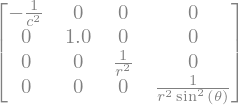

In [5]:
g_inv = [[ g[i][j]**-1 if g[i][j] != 0 else g[i][j] for j in range(len(g))] for i in range(len(g))]
sp.Matrix(g_inv)

In [13]:
#Este vector va a contener la matriz g derivada respecto de cada la variable
#Por ejemplo derivadas_variable[0] es la derivada de toda la matriz respecto de t
#            derivadas_variable[1] es la derivada de toda la matriz respecto de x
#Y derivadas_variable[1][0][0] es la derivad parcial de g_{0,0} respecto x
# y así sucesivamente 
derivadas_variable = []

for variable in variables: 
    derivada_variable = [[0 for i in variables] for j in variables]
    for i in range(len(variables)):
        for j in range(len(variables)): 
            func = g[i][j]
            #Para no hacer la derivada de un número 
            if type(func) == sp.core.mul.Mul or type(func) == sp.core.power.Pow: 
                derivada_variable[i][j] = simplify(func.diff(variable))
                
    derivadas_variable.append(derivada_variable)
derivadas_variable

In [14]:
simbolos_chistoffle = [[[0 for j in variables] for i in variables] for m in variables]


for m in range(len(variables)):
    for i in range(len(variables)):
        for j in range(len(variables)):
            simbolo = 0
            #El sumatorio respecto del indice libre l 
            for l in range(len(variables)):
                #Para evitar hacer una multiplicación por 0 
                if  g_inv[m][l] != 0: 
                    simbolo =simbolo + g_inv[m][l]*(derivadas_variable[j][i][l]+derivadas_variable[i][j][l]-derivadas_variable[l][i][j])
            simbolo =1/2*simbolo
            simbolos_chistoffle[m][i][j] = simplify(simbolo)
for i in range(len(simbolos_chistoffle)):
    for j in range(len(simbolos_chistoffle)):
        for k in range(len(simbolos_chistoffle)):
            if simbolos_chistoffle[i][j][k] != 0:
                
                display(Math(f'\Gamma^{{{variables[i]}}}_{{{variables[j]},{variables[k]}}} = ' +latex(simbolos_chistoffle[i][j][k])))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [15]:
#Variable para poder derivar 
tau = sp.symbols("tau")

#Defino las derivadas, esto para poder resolverlo 
dt = sp.Function('dt')(tau)
dr = sp.Function("dr")(tau)
dtheta = sp.Function('dtheta')(tau) 
dphi =  sp.Function('dphi')(tau)

variables_derivadas = [dt,dr,dtheta,dphi]


In [16]:
#Esto va a con
geodesicas = [i.diff(tau) for i in variables_derivadas]

for variable in range(len(variables)): 
    for i in range(len(variables)):
        for j in range(len(variables)):
            geodesicas[variable] = geodesicas[variable] +simplify( simbolos_chistoffle[variable][i][j]*variables_derivadas[i]*variables_derivadas[j])
    geodesicas[variable] = sp.Eq(geodesicas[variable],0)
    


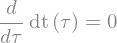

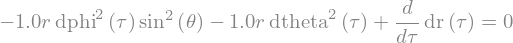

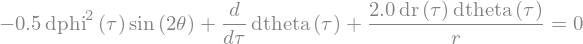

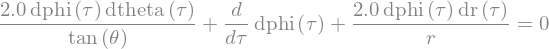

In [17]:
for v in geodesicas: 
    display(v)


In [18]:
t = sp.Function('t')(tau)
r = sp.Function('r')(tau)
theta = sp.Function('theta')(tau)
phi = sp.Function('phi')(tau)

In [19]:
u_0 =  sp.Function('u_0')(tau)
u_1 = sp.Function("u_1")(tau)
u_2 = sp.Function("u_2")(tau)
u_3 = sp.Function("u_3")(tau)

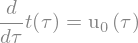

In [20]:
dt = sp.Eq(t.diff(),u_0)
dt

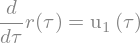

In [21]:
dr = sp.Eq(r.diff(),u_1)
dr

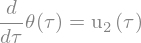

In [22]:
dtheta = sp.Eq(theta.diff(),u_2)
dtheta

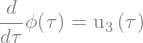

In [23]:
dphi = sp.Eq(phi.diff(),u_3)
dphi

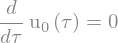

In [24]:
du_0 = sp.Eq(Derivative(u_0, tau), 0)
du_0

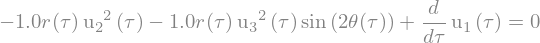

In [25]:
#Eq(-1.0*r*dphi(tau)**2*sin(2*theta) - 1.0*r*dtheta(tau)**2 + Derivative(dr(tau), tau), 0)
du_1 = sp.Eq(-1.0*r*u_3**2*sin(2*theta) - 1.0*r*u_2**2 + Derivative(u_1, tau), 0)
du_1

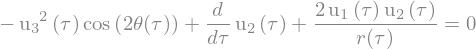

In [26]:
#Eq(-1.0*dphi(tau)**2*cos(2*theta) + Derivative(dtheta(tau), tau) + 2.0*dr(tau)*dtheta(tau)/r, 0)
du_2 = sp.Eq(-1*u_3**2*cos(2*theta)+ Derivative(u_2, tau)+2*u_1*u_2/r,0)
du_2

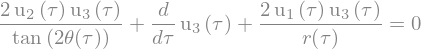

In [27]:
# Eq(2.0*dphi(tau)*dtheta(tau)/tan(2*theta) + Derivative(dphi(tau), tau) + 2.0*dphi(tau)*dr(tau)/r, 0)
du_3 = sp.Eq(2*u_3*u_2/tan(2*theta)+ u_3.diff()+2*u_3*u_1/r,0)
du_3

In [45]:
vv = dsolve_system([dt,dr,dtheta,dphi,du_0,du_1,du_2,du_3])

ValueError: 
Number of equations and number of functions don't match

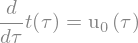

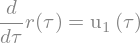

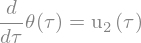

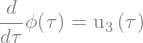

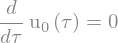

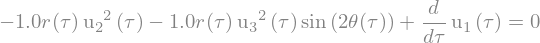

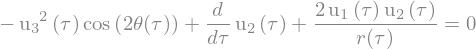

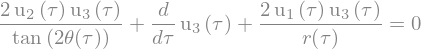

In [28]:
for f  in [dt,dr,dtheta,dphi,du_0,du_1,du_2,du_3]:
    display(f)

In [21]:
for f in vv[0]:
    display(f)

In [1]:
from libreria_geometria import componentes_tensor_riemann, componentes_tensor_curvatura, componentes_tensor_ricci, curvatura_escalar

### Componentes tensor curvatura de Riemann

In [12]:
R = componentes_tensor_riemann(g, variables)
for l in range(len(variables)):
    for i in range(len(variables)):
        for j in range(len(variables)):
            for k in range(len(variables)):
                if R[l][i][j][k] != 0:        
                    display(Math(f'R^{{{variables[l]}}}_{{{{{variables[i]},{variables[j]},{variables[k]}}}}} = ' +latex(sp.simplify(R[l][i][j][k]))))

<IPython.core.display.Math object>

## Componentes tensor curvatura 

In [11]:
R = componentes_tensor_curvatura(g,variables)
for l in range(len(variables)):
    for i in range(len(variables)):
        for j in range(len(variables)):
            for k in range(len(variables)):
                if R[l][i][j][k] != 0:        
                    display(Math(f'R_{{{{{variables[l]},{variables[i]},{variables[j]},{variables[k]}}}}} = ' +latex(R[l][i][j][k])))

<IPython.core.display.Math object>

### Componentes tensor de Ricci

In [14]:
Ricci_curv = componentes_tensor_ricci(g,variables)
for i in range(len(variables)):
    for j in range(len(variables)):
            display(Math(f'R_{{{{{variables[i]},{variables[j]}}}}} = '+latex(Ricci_curv[i][j])))
            

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Curvatura Escalar

In [15]:
curvatura_escalar(g,variables)